In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [8]:
import numpy as np
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [5]:
# Display columns with missing values
print(missing_values[missing_values > 0])

normalized-losses    37
num-of-doors          2
dtype: int64


In [6]:
# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 39


In [7]:
# Step 1: Handle missing values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [ ]:
# Convert 'normalized-losses' to numeric and fill missing values with the mean
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())


In [9]:
# Convert 'price' to numeric and drop rows with missing prices
df['price'] = pd.to_numeric(df['price'])
df.dropna(subset=['price'], inplace=True)

In [10]:
# Convert other numeric columns to numeric and fill missing values with mean
numeric_columns = ['bore', 'stroke', 'horsepower', 'peak-rpm']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    df[col] = df[col].fillna(df[col].mean())  # Fill missing values with mean

In [11]:
# Step 2: Drop irrelevant columns (e.g., names, identifiers)
df.drop(['symboling', 'make', 'fuel-system', 'engine-location'], axis=1, inplace=True)

In [12]:
# Step 3: Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels'], drop_first=True)

In [13]:
# Check cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   normalized-losses     165 non-null    float64
 1   wheel-base            202 non-null    float64
 2   length                202 non-null    float64
 3   width                 202 non-null    float64
 4   height                202 non-null    float64
 5   curb-weight           202 non-null    int64  
 6   engine-type           202 non-null    object 
 7   num-of-cylinders      202 non-null    object 
 8   engine-size           202 non-null    int64  
 9   bore                  202 non-null    float64
 10  stroke                202 non-null    float64
 11  compression-ratio     202 non-null    float64
 12  horsepower            202 non-null    float64
 13  peak-rpm              202 non-null    float64
 14  city-mpg              202 non-null    int64  
 15  highway-mpg           2

In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'ohc'

In [16]:
# Checking for non-numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['engine-type', 'num-of-cylinders'], dtype='object')


### Encoding The Data --> one hot Encoding

In [17]:
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Now redefine the features and target after encoding
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree Regression Model 

In [18]:
# Initialize the Decision Tree Regressor again
model = DecisionTreeRegressor(random_state=42)

# Train the model on the encoded training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 7032928.536585365
R² Score: 0.9388033624964309


### Visualizing the Decision Tree

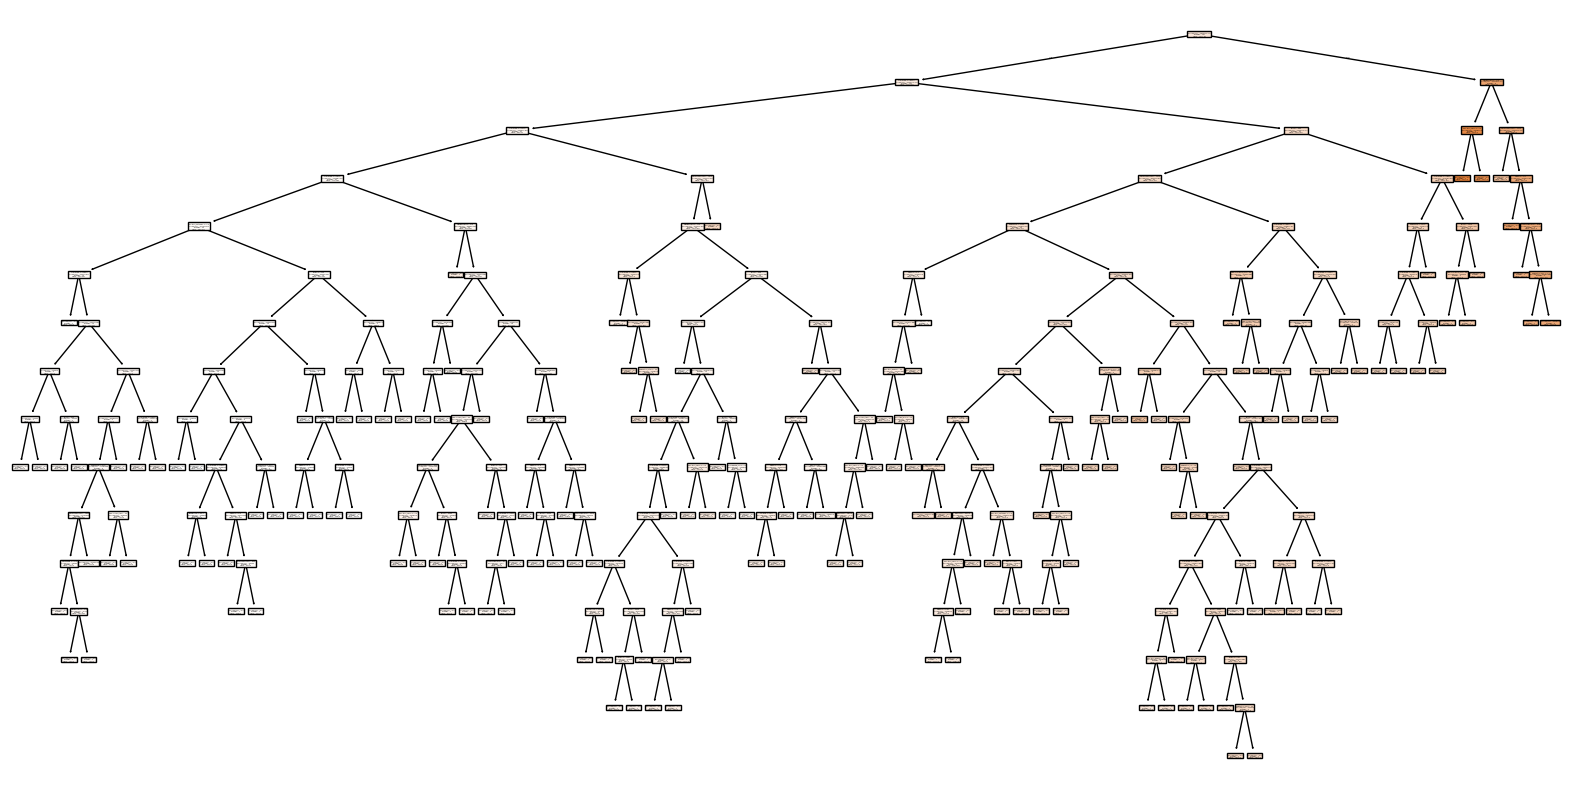

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

# 2) Feature Engineering 
### - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

In [ ]:
Steps for Feature Engineering:

    Inspect the dataset to identify the relevant columns (horsepower and curb_weight).
    Handle missing or non-numeric values (if any) to avoid issues during calculation.
    Create the new feature by dividing horsepower by curb_weight.
    Add the new feature to the dataset.

In [20]:
# Convert the 'horsepower' and 'curb-weight' columns to numeric values (handling non-numeric issues)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['curb-weight'] = pd.to_numeric(df['curb-weight'], errors='coerce')

# Create the new feature 'hp_to_weight_ratio'
df['hp_to_weight_ratio'] = df['horsepower'] / df['curb-weight']

# Inspect the new column
print(df[['horsepower', 'curb-weight', 'hp_to_weight_ratio']].head())

   horsepower  curb-weight  hp_to_weight_ratio
0       111.0         2548            0.043564
1       111.0         2548            0.043564
2       154.0         2823            0.054552
3       102.0         2337            0.043646
4       115.0         2824            0.040722


# 3) Exploratory Data Analysis (EDA)
### - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

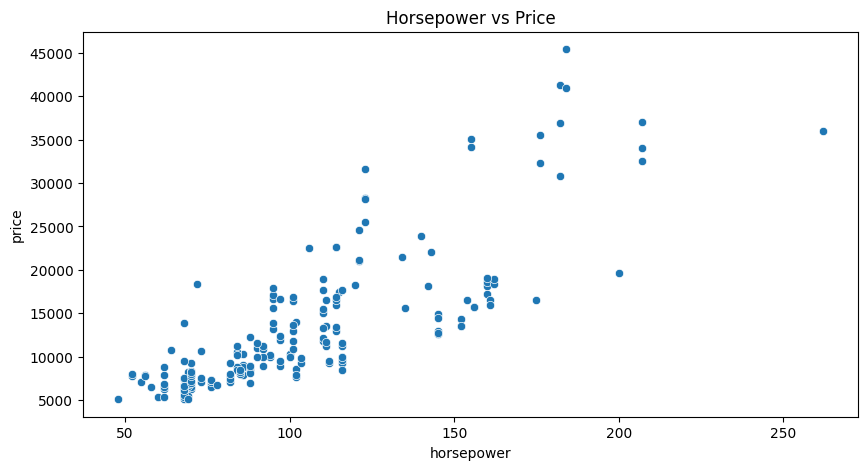

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of horsepower vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title('Horsepower vs Price')
plt.show()




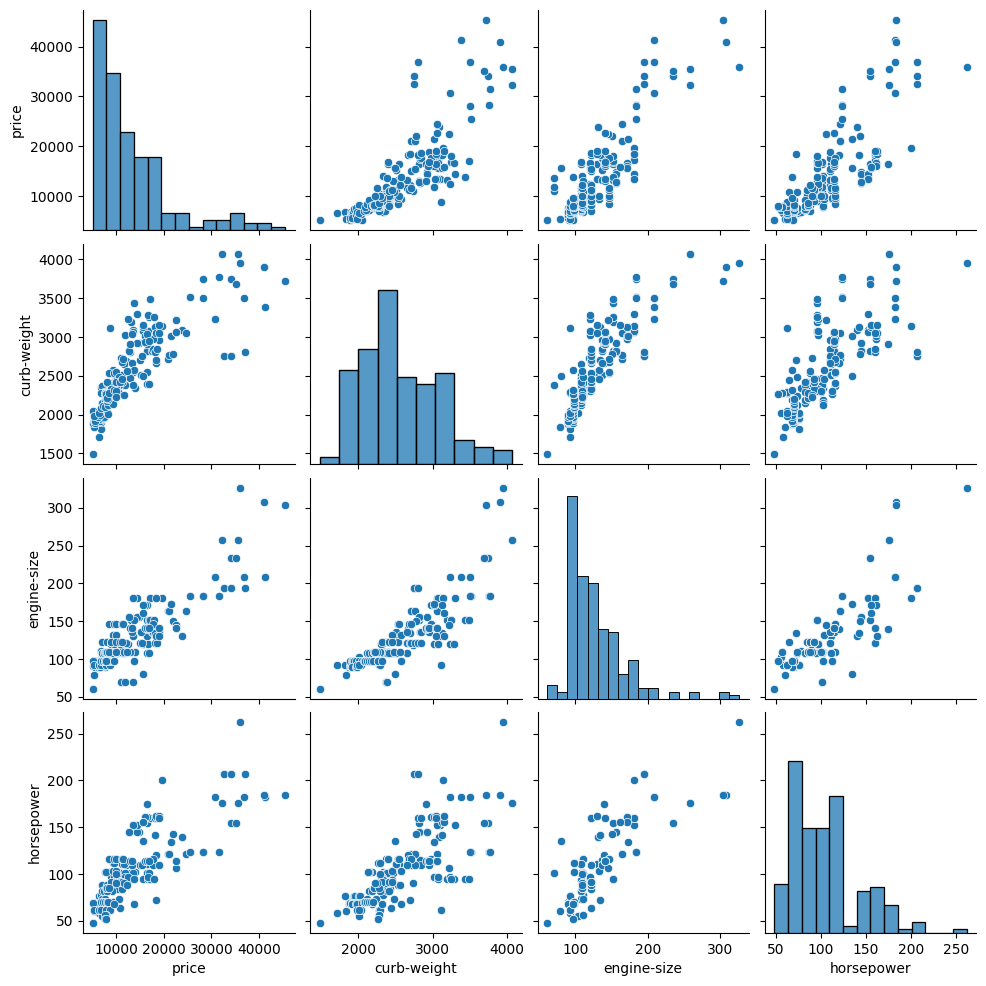

In [24]:
# Pairplot to see relationships between numerical features
sns.pairplot(df[['price', 'curb-weight', 'engine-size', 'horsepower']])
plt.show()

# 4) Handling Missing value 
### Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

In [35]:
# Check cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   normalized-losses     165 non-null    float64
 1   wheel-base            202 non-null    float64
 2   length                202 non-null    float64
 3   width                 202 non-null    float64
 4   height                202 non-null    float64
 5   curb-weight           202 non-null    int64  
 6   engine-type           202 non-null    object 
 7   num-of-cylinders      202 non-null    object 
 8   engine-size           202 non-null    int64  
 9   bore                  202 non-null    float64
 10  stroke                202 non-null    float64
 11  compression-ratio     202 non-null    float64
 12  horsepower            202 non-null    float64
 13  peak-rpm              202 non-null    float64
 14  city-mpg              202 non-null    int64  
 15  highway-mpg           2

In [36]:
# Impute missing values with mean (for numerical columns)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['curb-weight'] = df['curb-weight'].fillna(df['curb-weight'].mean())

# Impute categorical columns with mode
df['num-of-cylinders'] = df['num-of-cylinders'].fillna(df['num-of-cylinders'].mode()[0])

# Verify if there are still missing values
print(df.isnull().sum())


normalized-losses       37
wheel-base               0
length                   0
width                    0
height                   0
curb-weight              0
engine-type              0
num-of-cylinders         0
engine-size              0
bore                     0
stroke                   0
compression-ratio        0
horsepower               0
peak-rpm                 0
city-mpg                 0
highway-mpg              0
price                    0
fuel-type_gas            0
aspiration_turbo         0
num-of-doors_two         0
body-style_hardtop       0
body-style_hatchback     0
body-style_sedan         0
body-style_wagon         0
drive-wheels_fwd         0
drive-wheels_rwd         0
hp_to_weight_ratio       0
dtype: int64


# 5) Training the Model
### - Task: Use relavant ML Models

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree Mean Squared Error: {dt_mse}")
print(f"Decision Tree R-squared: {dt_r2}")


Decision Tree Mean Squared Error: 7032928.536585365
Decision Tree R-squared: 0.9388033624964309


# 7) Model Evaluation
### - Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [38]:
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R-squared: {r2}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree R-squared: {dt_r2}")


Linear Regression MSE: 7032928.536585365
Linear Regression R-squared: 0.9388033624964309
Decision Tree MSE: 7032928.536585365
Decision Tree R-squared: 0.9388033624964309
